In [1]:
#Imports


import cv2
import numpy as np
from PIL import Image
import os
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

**Path Checking**

In [ ]:
path = os.getcwd()
print(path)

In [ ]:
%mkdir dataset

# **Creating Data Set of Faces**

pass all image section one by one.

In [60]:
with open('happy.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("data_set/happy/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  1

 Done creating face data


In [ ]:
%mkdir trainer

# **Training Images**

In [61]:
# Path for face image database
path = 'dataset'
        
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = []
    
    for f in os.listdir(path):
        if not f.startswith('.'):
            imgPth = os.path.join(path,f)
            imagePaths.append(imgPth)
     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml') 

# Print the numer of Emotions trained and end program
print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces....

 [INFO] 9 Emotions trained. Exiting Program


# **Test Result**

In [62]:
csv = 'test.csv'

df = pd.read_csv(csv)

imagesName = df.iloc[:, 0]
result = df.iloc[:, 1]

In [63]:
testResult = []
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0

# Min window size to be recognized as a face

minW = 0.1*640
minH = 0.1*480

for img in glob.glob("test/*.jpg"):

    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
    )

    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
        testResult.append(id)
        
        

cm = confusion_matrix(result, testResult)

print(cm)

report = classification_report(result, testResult)
print(report)

[[ 2  0  0  1  9  1  1  1  0]
 [ 0  0  0  0  2  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 1  1  0  0  4  0  0  0  0]
 [10  1  1  2 30  2  5  4  1]
 [ 0  0  0  1  3  0  0  0  0]
 [ 1  0  0  1  4  1  2  2  0]
 [ 1  0  0  1  3  0  2  1  0]
 [ 0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.13      0.13      0.13        15
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.54      0.54      0.54        56
           5       0.00      0.00      0.00         4
           6       0.18      0.18      0.18        11
           7       0.12      0.12      0.12         8
           8       0.00      0.00      0.00         1

    accuracy                           0.33       105
   macro avg       0.11      0.11      0.11       105
weighted avg       0.33      0.33      0.33       105



# **Single Image Testing**

In [73]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0

# Emotions related to ids: example ==> Anger: id=0,  etc
names = ['angry', 'confused', 'crying', 'fear', 'happy', 'puzzled', 'sad', 'scared', 'shy'] 

minW = 0.1*640
minH = 0.1*480

imgName = "test1.jpg"

def outName(filename):
    name, ext = os.path.splitext(filename)
    return "{name}_{uid}{ext}".format(name=name, uid="Out", ext=ext)

img = cv2.imread(imgName)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
    print(names[id])
    
    info = ""

    # Check if confidence is less them 100 ==> "0" is perfect match 
    if (confidence < 100):
        id = names[id]
        confidence = "{0}%".format(round(100 - confidence))
        info = str(id)+":"+str(confidence)
    else:
        id = "unknown"
        confidence = "{0}%".format(round(100 - confidence))
        info = str(id)+" : "+str(confidence)
    cv2.putText(img, info, (x+5,y-5), font, 1, (0,0,255), 1)
#     cv2.putText(img, str(confidence), (x+25,y-5), font, 1, (0,0,255), 1)  

cv2.imwrite(outName(imgName),img) 

print("\n [INFO] Done detecting and Image is saved")
cv2.destroyAllWindows()

confused
happy
sad
angry
sad

 [INFO] Done detecting and Image is saved


# **Display Detected Images**

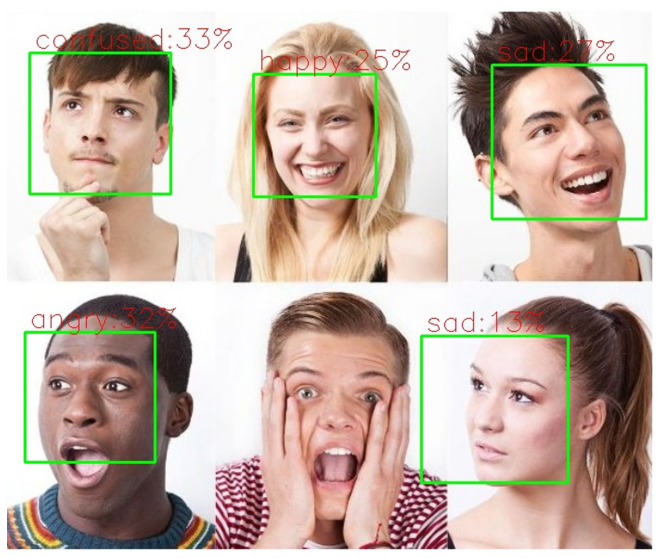

In [74]:
%matplotlib inline

image = cv2.imread(outName(imgName))
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()